<a href="https://colab.research.google.com/github/RendiZein/Metode-Rekayasa-Komputasi/blob/main/Least_Square_Method_%26_Interpolation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Nomor 16 (linier)

In [ ]:
def linier(x,y):
  N=len(x)
  sum_tj=np.sum(x)
  sum_tj2=np.sum([j**2 for j in x])
  sum_yj=np.sum(y)
  sum_tjyj=np.sum([j*y[i] for i,j in enumerate(x)])
  a0=(sum_yj*sum_tj2-sum_tj*sum_tjyj)/(N*sum_tj2-(sum_tj**2))
  a1=(N*sum_tjyj-sum_tj*sum_yj)/(N*sum_tj2-(sum_tj**2))
  ft=lambda t: a0+a1*t
  yr=[ft(t) for t in x]
  error=[j-y[i] for i,j in enumerate(yr)]
  df = pd.DataFrame(list(zip(x,y,yr,error)),
                    columns =['x','y','y pred','error'])
  df['x']=df['x'].apply(lambda x: round(x,0))
  df['y']=df['y'].apply(lambda x: round(x,0))
  df['y pred']=df['y pred'].apply(lambda x: round(x,1))
  df['error']=df['error'].apply(lambda x: round(x,1))
  print('N : {}'.format(N))
  print('sum_tj : {}'.format(sum_tj))
  print('sum_tj2 : {}'.format(sum_tj2))
  print('sum_yj : {}'.format(sum_yj))
  print('sum_tjyj : {}'.format(sum_tjyj))
  print('a0 : {}'.format(a0))
  print('a1 : {}'.format(a1))
  print('y=f(t)={}+{}t'.format(round(a0,5),round(a1,5)))
  display(df.T)
  graphWidth=600
  graphHeight=600
  f = plt.figure(figsize=(graphWidth/100.0, graphHeight/100.0), dpi=100)
  axes = f.add_subplot(111)
  axes.plot(x, yr,'rx', label='Predicted Value')
  axes.plot(x, yr, label='Regression Line')

  # now add individual line for each point
  for i in range(len(x)):
      lineXdata = (x[i], x[i]) # same X
      lineYdata = (y[i], yr[i]) # different Y
      if i==0:
        plt.plot(lineXdata, lineYdata,c='k', label='error')
      else:
        plt.plot(lineXdata, lineYdata,c='k')

  axes.scatter(x,y, label='Real Value')
  axes.set_title('Regresi Linier Bulan vs Penghasilan') # X axis data label
  axes.set_xlabel('Bulan') # X axis data label
  axes.set_ylabel('Penghasilan (Rp)') # Y axis data label
  axes.legend()

  plt.show()

## Soal

N : 12
sum_tj : 78.0
sum_tj2 : 650.0
sum_yj : 277
sum_tjyj : 2133.0
a0 : 7.96969696969697
a1 : 2.325174825174825
y=f(t)=7.9697+2.32517t


,0,1,2,3,4,5,6,7,8,9,10,11
x,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0
y,12.0,10.0,14.0,20.0,17.0,26.0,24.0,19.0,36.0,27.0,40.0,32.0
y pred,10.3,12.6,14.9,17.3,19.6,21.9,24.2,26.6,28.9,31.2,33.5,35.9
error,-1.7,2.6,0.9,-2.7,2.6,-4.1,0.2,7.6,-7.1,4.2,-6.5,3.9


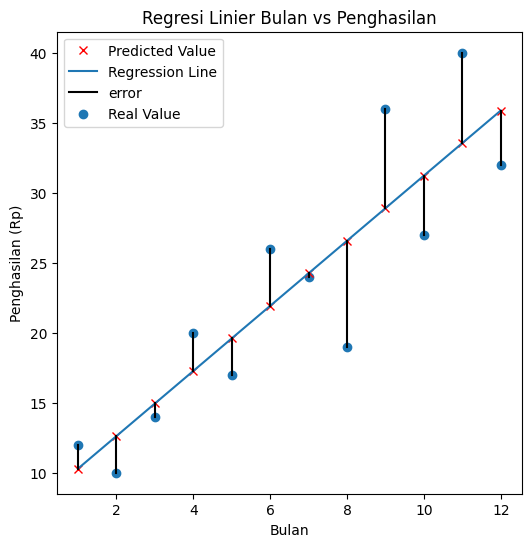

In [ ]:
x = np.linspace(1,12,12)
y = [12,10,14,20,17,26,24,19,36,27,40,32]
linier(x,y)

## Contoh

sum_tj : 550.0
sum_tj2 : 38500.0
sum_yj : 3913
sum_tjyj : 205740.0
a0 : 309.8636363636364
a1 : 0.9172727272727272
y=f(t)=309.86364+0.91727t


,0,1,2,3,4,5,6,7,8,9,10
Bulan,0.0,10.0,20.0,30.0,40.0,50.0,60.0,70.0,80.0,90.0,100.0
y,301.0,323.0,334.0,340.0,350.0,349.0,365.0,376.0,380.0,394.0,401.0
y pred,309.9,319.0,328.2,337.4,346.6,355.7,364.9,374.1,383.2,392.4,401.6
error,8.9,-4.0,-5.8,-2.6,-3.4,6.7,-0.1,-1.9,3.2,-1.6,0.6


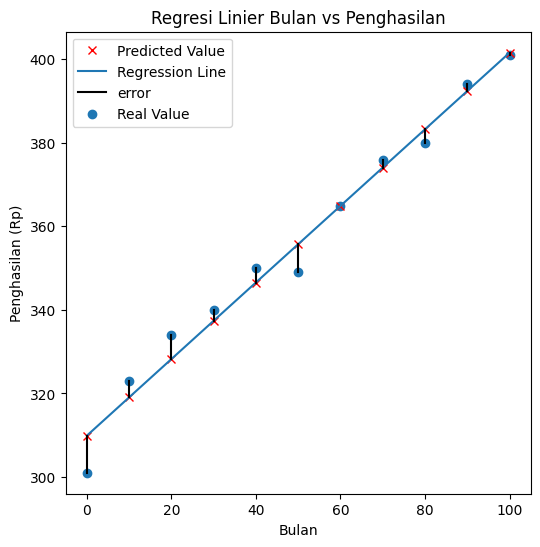

In [ ]:
x = np.linspace(0,100,11)
y = [301,323,334,340,350,349,365,376,380,394,401]
linier(x,y)

# Nomor 17 (kuadratis)

In [ ]:
def kuadratis(x,y):
  N=len(x)
  sum_tj=np.sum(x)
  sum_tj2=np.sum([j**2 for j in x])
  sum_tj3=np.sum([j**3 for j in x])
  sum_tj4=np.sum([j**4 for j in x])
  sum_yj=np.sum(y)
  sum_tjyj=np.sum([j*y[i] for i,j in enumerate(x)])
  sum_tj2yj=np.sum([j**2*y[i] for i,j in enumerate(x)])
  a0=(sum_yj*(sum_tj2*sum_tj4-(sum_tj3**2))\
      +(sum_tjyj*((sum_tj3*sum_tj2)-(sum_tj*sum_tj4)))\
      +(sum_tj2yj*(sum_tj*sum_tj3-(sum_tj2**2))))\
      /((N*(sum_tj2*sum_tj4-(sum_tj3**2)))\
        +(sum_tj*(sum_tj3*sum_tj2-sum_tj*sum_tj4))\
        +(sum_tj2*(sum_tj*sum_tj3-(sum_tj2**2))))
  a1=((sum_yj*(sum_tj3*sum_tj2-sum_tj*sum_tj4))\
      +(sum_tjyj*(N*sum_tj4-(sum_tj2**2)))\
      +(sum_tj2yj*(sum_tj2*sum_tj-(N*sum_tj3))))\
  /((N*(sum_tj2*sum_tj4-(sum_tj3**2)))\
    +(sum_tj*(sum_tj3*sum_tj2-sum_tj*sum_tj4))\
    +(sum_tj2*(sum_tj*sum_tj3-(sum_tj2**2))))
  a2=((sum_yj*(sum_tj*sum_tj3-(sum_tj2**2)))\
      +(sum_tjyj*(sum_tj*sum_tj2-N*sum_tj3))\
      +(sum_tj2yj*(N*sum_tj2-sum_tj**2)))\
  /((N*(sum_tj2*sum_tj4-(sum_tj3**2)))\
    +(sum_tj*(sum_tj3*sum_tj2-sum_tj*sum_tj4))\
    +(sum_tj2*(sum_tj*sum_tj3-(sum_tj2**2))))
  print('N : {}'.format(N))
  print('sum_tj : {}'.format(sum_tj))
  print('sum_tj2 : {}'.format(sum_tj2))
  print('sum_tj3 : {}'.format(sum_tj3))
  print('sum_tj4 : {}'.format(sum_tj4))
  print('sum_yj : {}'.format(sum_yj))
  print('sum_tjyj : {}'.format(sum_tjyj))
  print('sum_tj2yj : {}'.format(sum_tj2yj))
  print('a0 : {}'.format(a0))
  print('a1 : {}'.format(a1))
  print('a2 : {}'.format(a2))
  ft=lambda t: a0+a1*t+a2*t**2
  yr=[ft(t) for t in x]
  error=[j-y[i] for i,j in enumerate(yr)]
  df = pd.DataFrame(list(zip(x,y,yr,error)),
                    columns =['x','y','y pred','error'])
  # df['Bulan']=df['Bulan'].apply(lambda x: round(x,0))
  df['y']=df['y'].apply(lambda x: round(x,0))
  df['y pred']=df['y pred'].apply(lambda x: round(x,1))
  df['error']=df['error'].apply(lambda x: round(x,1))
  print('y=f(t)={}+{}t+{}tt'.format(round(a0,5),round(a1,5),round(a2,5)))
  display(df.T)
  graphWidth=18*40
  graphHeight=9*40
  f = plt.figure(figsize=(graphWidth/100.0, graphHeight/100.0), dpi=100)
  axes = f.add_subplot(111)
  axes.plot(x, yr,'rx', label='Predicted Value')
  axes.plot(x, yr, label='Regression Line')

  # now add individual line for each point
  for i in range(len(x)):
      lineXdata = (x[i], x[i]) # same X
      lineYdata = (y[i], yr[i]) # different Y
      if i==0:
        plt.plot(lineXdata, lineYdata,c='k', label='error')
      else:
        plt.plot(lineXdata, lineYdata,c='k')

  axes.scatter(x,y, label='Real Value')
  axes.set_title('Regresi Kuadratis Waktu vs Tekanan') # X axis data label
  axes.set_xlabel('Waktu (menit)') # X axis data label
  axes.set_ylabel('Tekanan (Bar)') # Y axis data label
  axes.legend()

  plt.show()

## Soal

N : 12
sum_tj : 1320.0
sum_tj2 : 202400.0
sum_tj3 : 34848000.0
sum_tj4 : 6395840000.0
sum_yj : 277
sum_tjyj : 37120.0
sum_tj2yj : 6130400.0
a0 : 10.134615384615385
a1 : 0.12106643356643357
a2 : -2.1853146853146853e-05
y=f(t)=10.13462+0.12107t+-2e-05tt


,0,1,2,3,4,5,6,7,8,9,10,11
x,0.0,20.0,40.0,60.0,80.0,100.0,120.0,140.0,160.0,180.0,200.0,220.0
y,12.0,10.0,14.0,20.0,17.0,26.0,24.0,19.0,36.0,27.0,40.0,32.0
y pred,10.1,12.5,14.9,17.3,19.7,22.0,24.3,26.7,28.9,31.2,33.5,35.7
error,-1.9,2.5,0.9,-2.7,2.7,-4.0,0.3,7.7,-7.1,4.2,-6.5,3.7


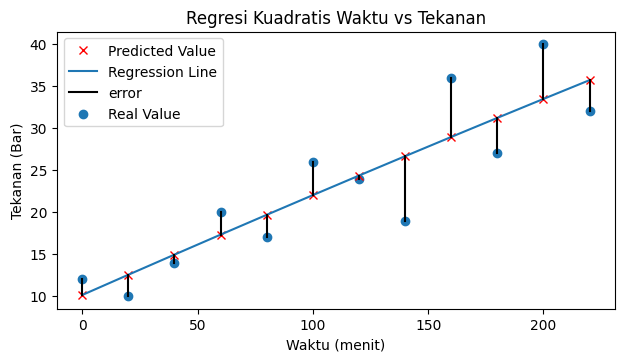

In [ ]:
x = np.linspace(0,220,12)
y = [12,10,14,20,17,26,24,19,36,27,40,32]
kuadratis(x,y)

## Contoh

N : 11
sum_tj : 825.0
sum_tj2 : 86625.0
sum_tj3 : 10209375.0
sum_tj4 : 1282483125.0
sum_yj : 3103
sum_tjyj : 298560.0
sum_tj2yj : 34419600.0
a0 : 91.0
a1 : 2.2862626262626264
a2 : 0.0024915824915824917
y=f(t)=91.0+2.28626t+0.00249tt


,0,1,2,3,4,5,6,7,8,9,10
x,0.0,15.0,30.0,45.0,60.0,75.0,90.0,105.0,120.0,135.0,150.0
y,110.0,121.0,140.0,170.0,230.0,340.0,331.0,341.0,380.0,440.0,500.0
y pred,91.0,125.9,161.8,198.9,237.1,276.5,316.9,358.5,401.2,445.1,490.0
error,-19.0,4.9,21.8,28.9,7.1,-63.5,-14.1,17.5,21.2,5.1,-10.0


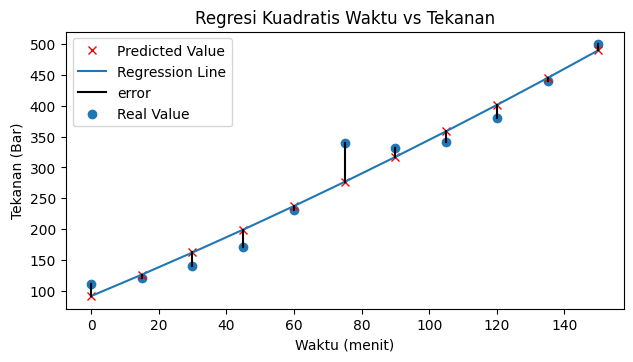

In [ ]:
x = np.linspace(0,150,11)
y = [110,121,140,170,230,340,331,341,380,440,500]
kuadratis(x,y)

# Nomor 18 (eksponensial)

In [ ]:
def eksponensial(x,y):
  N = len(x)
  sum_tj=np.sum(x)
  sum_tj2=np.sum([j**2 for j in x])
  sum_lnyj=np.sum([np.log(j) for j in y])
  sum_tjlnyj=np.sum([x[i]*np.log(j) for i,j in enumerate(y)])
  a0 = np.exp(((sum_lnyj*sum_tj2)-(sum_tj*sum_tjlnyj))\
              /((N*sum_tj2)-(sum_tj**2)))
  a1=((N*sum_tjlnyj)-(sum_tj*sum_lnyj))\
    /((N*sum_tj2)-(sum_tj**2))
  T12=np.log(2)/np.abs(a1)
  print('N : {}'.format(N))
  print('sum_tj : {}'.format(sum_tj))
  print('sum_tj2 : {}'.format(sum_tj2))
  print('sum_lnyj : {}'.format(sum_lnyj))
  print('sum_tjlnyj : {}'.format(sum_tjlnyj))
  print('a0 : {}'.format(a0))
  print('a1 : {}'.format(a1))
  ft=lambda t: a0*np.exp(a1*t)
  yr=[ft(t) for t in x]
  error=[j-y[i] for i,j in enumerate(yr)]
  df = pd.DataFrame(list(zip(x,y,yr,error)),
                    columns =['Bulan','y','y pred','error'])
  # df['Bulan']=df['Bulan'].apply(lambda x: round(x,0))
  df['y']=df['y'].apply(lambda x: round(x,0))
  df['y pred']=df['y pred'].apply(lambda x: round(x,1))
  df['error']=df['error'].apply(lambda x: round(x,1))
  print('y=f(t)={}e^{}t'.format(round(a0,5),round(a1,5)))
  print('Waktu paruh : {} '.format(T12))
  print("")
  display(df.T)
  graphWidth=800
  graphHeight=600
  f = plt.figure(figsize=(graphWidth/100.0, graphHeight/100.0), dpi=100)
  axes = f.add_subplot(111)
  axes.plot(x, yr,'rx', label='Predicted Value')
  axes.plot(x, yr, label='Regression Line')

  # now add individual line for each point
  for i in range(len(x)):
      lineXdata = (x[i], x[i]) # same X
      lineYdata = (y[i], yr[i]) # different Y
      if i==0:
        plt.plot(lineXdata, lineYdata,c='k', label='error')
      else:
        plt.plot(lineXdata, lineYdata,c='k')

  axes.scatter(x,y, label='Real Value')
  axes.set_title('Regresi Eksponensial Aktivitas vs Waktu')
  axes.set_xlabel('Waktu (hari)') # X axis data label
  axes.set_ylabel('Aktivitas (Ci)') # Y axis data label
  axes.legend()
  plt.show()

## Soal

N : 12
sum_tj : 132.0
sum_tj2 : 2024.0
sum_lnyj : 81.9599459406658
sum_tjlnyj : 895.1297278183379
a0 : 1046.9569995179186
a1 : -0.011240694980744755
y=f(t)=1046.957e^-0.01124t
Waktu paruh : 61.66408587256414 



,0,1,2,3,4,5,6,7,8,9,10,11
Bulan,0.0,2.0,4.0,6.0,8.0,10.0,12.0,14.0,16.0,18.0,20.0,22.0
y,1067.0,1068.0,1010.0,967.0,921.0,923.0,880.0,874.0,866.0,869.0,850.0,845.0
y pred,1047.0,1023.7,1000.9,978.7,956.9,935.6,914.8,894.5,874.6,855.2,836.2,817.6
error,-20.0,-44.3,-9.1,11.7,35.9,12.6,34.8,20.5,8.6,-13.8,-13.8,-27.4


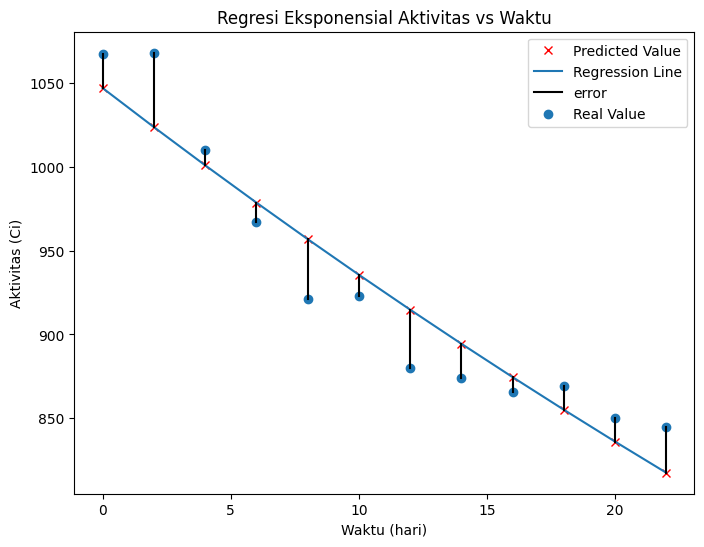

In [ ]:
x = np.linspace(0,22,12)
y = [1067,1068,1010,967,921,923,880,874,866,869,850,845]
eksponensial(x,y)

## Contoh

N : 11
sum_tj : 55.0
sum_tj2 : 385.0
sum_lnyj : 66.4573239030189
sum_tjlnyj : 340.4542049279116
a0 : 290.12765560724364
a1 : 0.0742507764801551
y=f(t)=290.12766e^0.07425t


,0,1,2,3,4,5,6,7,8,9,10
Bulan,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0
y,300.0,323.0,360.0,345.0,370.0,401.0,450.0,435.0,560.0,555.0,670.0
y pred,290.1,312.5,336.6,362.5,390.5,420.6,453.0,487.9,525.5,566.0,609.6
error,-9.9,-10.5,-23.4,17.5,20.5,19.6,3.0,52.9,-34.5,11.0,-60.4


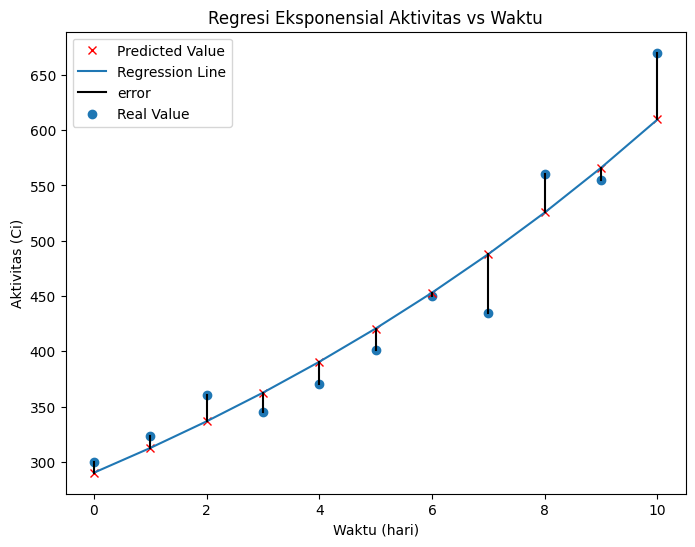

In [ ]:
x = np.linspace(0,10,11)
y = [300,323,360,345,370,401,450,435,560,555,670]
eksponensial(x,y)

# Nomor 19 (fungsi pangkat)

In [ ]:
def fungsi_pangkat(x,y):
  N = len(x)
  sum_lntj=np.sum([np.log(j) for j in x])
  sum_lntj2=np.sum([(np.log(j))**2 for j in x])
  sum_lnyj=np.sum([np.log(j) for j in y])
  sum_lntjlnyj=np.sum([np.log(j)*np.log(y[i]) for i,j in enumerate(x)])
  a0=np.exp(((sum_lnyj*sum_lntj2)-(sum_lntj*sum_lntjlnyj))\
            /((N*sum_lntj2)-(sum_lntj**2)))
  a1=((N*sum_lntjlnyj)-(sum_lntj*sum_lnyj))\
  /((N*sum_lntj2)-(sum_lntj**2))
  print('N : {}'.format(N))
  print('sum_lntj : {}'.format(sum_lntj))
  print('sum_lntj2 : {}'.format(sum_lntj2))
  print('sum_lnyj : {}'.format(sum_lnyj))
  print('sum_lntjlnyj : {}'.format(sum_lntjlnyj))
  print('a0 : {}'.format(a0))
  print('a1 : {}'.format(a1))
  ft=lambda x:a0*(x**a1)
  yr=[ft(t) for t in x]
  error=[j-y[i] for i,j in enumerate(yr)]
  df = pd.DataFrame(list(zip(x,y,yr,error)),
                    columns =['x','y','y pred','error'])
  # df['Bulan']=df['Bulan'].apply(lambda x: round(x,0))
  df['x']=df['x'].apply(lambda x: round(x,0))
  df['y pred']=df['y pred'].apply(lambda x: round(x,1))
  df['error']=df['error'].apply(lambda x: round(x,1))
  print('y=f(t)={}t^{}'.format(round(a0,5),round(a1,5)))
  display(df.T)
  graphWidth=800
  graphHeight=600
  f = plt.figure(figsize=(graphWidth/100.0, graphHeight/100.0), dpi=100)
  axes = f.add_subplot(111)
  axes.plot(x, yr,'rx', label='Predicted Value')
  axes.plot(x, yr, label='Regression Line')

  # now add individual line for each point
  for i in range(len(x)):
      lineXdata = (x[i], x[i]) # same X
      lineYdata = (y[i], yr[i]) # different Y
      if i==0:
        plt.plot(lineXdata, lineYdata,c='k', label='error')
      else:
        plt.plot(lineXdata, lineYdata,c='k')

  axes.scatter(x,y, label='Real Value')
  axes.set_title('Regresi Pangkat Tekanan vs Volume')
  axes.set_xlabel('Tekanan (Bar)') # X axis data label
  axes.set_ylabel('Volume (liter)') # Y axis data label
  axes.legend()
  plt.show()

## Soal

N : 12
sum_lntj : 28.30498066238123
sum_lntj2 : 73.04850552145886
sum_lnyj : 46.21476760397397
sum_lntjlnyj : 103.63027731507805
a0 : 354.2922620329009
a1 : -0.8559164460392437
y=f(t)=354.29226t^-0.85592


,0,1,2,3,4,5,6,7,8,9,10,11
x,2.0,4.0,6.0,8.0,10.0,12.0,14.0,16.0,18.0,20.0,22.0,24.0
y,200.0,102.0,76.0,60.0,53.0,42.0,36.0,33.0,30.0,29.0,25.0,22.0
y pred,195.8,108.2,76.4,59.8,49.4,42.2,37.0,33.0,29.9,27.3,25.1,23.3
error,-4.2,6.2,0.4,-0.2,-3.6,0.2,1.0,0.0,-0.1,-1.7,0.1,1.3


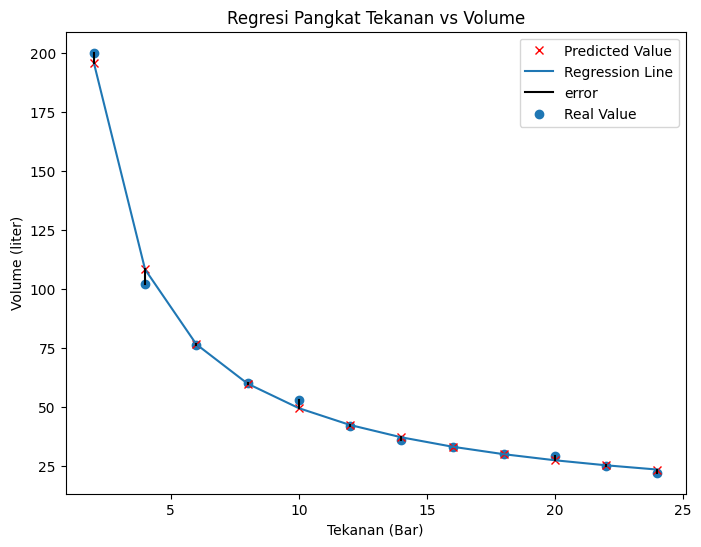

In [ ]:
x = np.linspace(2,24,12)
y = [200,102,76,60,53,42,36,33,30,29,25,22]
fungsi_pangkat(x,y)

## Contoh

N : 11
sum_lntj : 17.502307845873887
sum_lntj2 : 33.40014554645001
sum_lnyj : 55.1392301704815
sum_lntjlnyj : 89.16805158845764
a0 : 99.62425888125095
a1 : 0.2584669137540524
y=f(t)=99.62426t^0.25847


,0,1,2,3,4,5,6,7,8,9,10
Bulan,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0
y,100.0,120.0,131.0,143.0,150.0,157.0,165.0,170.0,175.0,182.0,187.0
y pred,99.6,119.2,132.3,142.6,151.0,158.3,164.7,170.5,175.8,180.6,185.2
error,-0.4,-0.8,1.3,-0.4,1.0,1.3,-0.3,0.5,0.8,-1.4,-1.8


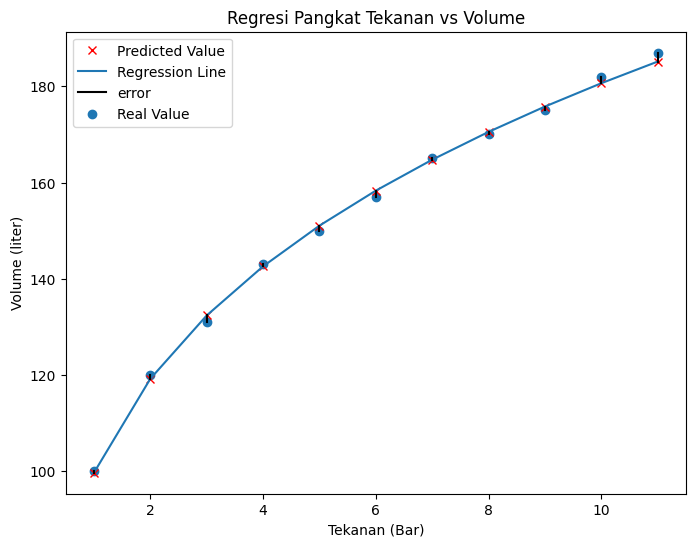

In [ ]:
x = np.linspace(1,11,11)
y = [100,120,131,143,150,157,165,170,175,182,187]
fungsi_pangkat(x,y)

# Nomor 20 (Interpolation)

In [ ]:
x = [0.01,25,50,75,100,130,160,190,220,260,300]
y = [0.6113,3.169,12.35,38.58,101.33,210.1,617.8,1254.4,2318,4688,8581]
print(len(x)==len(y))

True


## Function


In [12]:
def interpolation(xp,x,y,pr=2):
  # Tentukan index
  for j,i in enumerate(x):
    if i>j and x[j+1]>xp:
      break
  # tentukan interpolasi linier
  yil=y[j]+y[j+1]*((x[j+1]-xp)/(x[j+1]-x[j]))
  # tentukan interpolasi kuadratis
  yik=y[j-1]+\
   (y[j]-y[j-1])*(((xp-x[j-1])*(xp-x[j+1]))/((x[j]-x[j-1])*(x[j]-x[j+1])))+\
    (y[j+1]-y[j-1])*(((xp-x[j-1])*(xp-x[j]))/((x[j+1]-x[j-1])*(x[j+1]-x[j])))
  # tentukan polynominal order 3
  yip=y[j-2]+\
  (y[j-1]-y[j-2])*((xp-x[j-2])*(xp-x[j])*(xp-x[j+1]))/((x[j-1]-x[j-2])*(x[j-1]-x[j])*(x[j-1]-x[j+1]))+\
  (y[j]-y[j-2])*((xp-x[j-2])*(xp-x[j-1])*(xp-x[j+1]))/((x[j]-x[j-2])*(x[j]-x[j-1])*(x[j]-x[j+1]))+\
  (y[j+1]-y[j-2])*((xp-x[j-2])*(xp-x[j-1])*(xp-x[j]))/((x[j+1]-x[j-2])*(x[j+1]-x[j-1])*(x[j+1]-x[j]))
  print("Titik Interpolasi : {}".format(xp))
  print("Nilai Interpolasi Linier : {}".format(yil))
  print('Index interpolasi linier adalah {}'.format(j))
  print('Nilai x yang telibat adalah {}'.format(x[j:j+2]))
  print('Nilai y yang telibat adalah {}\n'.format(y[j:j+2]))

  print("Nilai Interpolasi Kuadratis : {}".format(yik))
  print('Index Interpolasi Kuadratis adalah {}'.format(j-1))
  print('Nilai x yang telibat adalah {}'.format(x[j-1:j+2]))
  print('Nilai y yang telibat adalah {}\n'.format(y[j-1:j+2]))

  print("Nilai Interpolasi Polinominal Orde 3 : {}".format(yip))
  print('Index Interpolasi Kuadratis adalah {}'.format(j-1))
  print('Nilai x yang telibat adalah {}'.format(x[j-1:j+2]))
  print('Nilai y yang telibat adalah {}\n\n\n'.format(y[j-1:j+2]))

## Soal

In [14]:
x=[0.01,25,50,75,100,130,160,190,220,260,300]
y=[0.6113,3.169,12.35,38.58,101.33,270.1,617.8,1254.4,2318,4688,8581]
xps = [30,80,115,170,210,270]
for xp in xps:
  interpolation(xp,x,y)

Titik Interpolasi : 30
Nilai Interpolasi Linier : 13.049000000000001
Index interpolasi linier adalah 1
Nilai x yang telibat adalah [25, 50]
Nilai y yang telibat adalah [3.169, 12.35]

Nilai Interpolasi Kuadratis : 4.475311901531967
Index Interpolasi Kuadratis adalah 0
Nilai x yang telibat adalah [0.01, 25, 50]
Nilai y yang telibat adalah [0.6113, 3.169, 12.35]

Nilai Interpolasi Polinominal Orde 3 : 3.2956598159178156
Index Interpolasi Kuadratis adalah 0
Nilai x yang telibat adalah [0.01, 25, 50]
Nilai y yang telibat adalah [0.6113, 3.169, 12.35]



Titik Interpolasi : 80
Nilai Interpolasi Linier : 119.644
Index interpolasi linier adalah 3
Nilai x yang telibat adalah [75, 100]
Nilai y yang telibat adalah [38.58, 101.33]

Nilai Interpolasi Kuadratis : 48.20839999999999
Index Interpolasi Kuadratis adalah 2
Nilai x yang telibat adalah [50, 75, 100]
Nilai y yang telibat adalah [12.35, 38.58, 101.33]

Nilai Interpolasi Polinominal Orde 3 : 47.585328000000004
Index Interpolasi Kuadratis adal

## Contoh

In [15]:
x=[0.01,25,50,75,100,130,160,190,220,260,300]
y=[0.6113,3.169,12.35,38.58,101.33,270.1,617.8,1254.4,2318,4688,8581]
xp = 150
interpolation(xp,x,y)

Titik Interpolasi : 150
Nilai Interpolasi Linier : 476.0333333333333
Index interpolasi linier adalah 5
Nilai x yang telibat adalah [130, 160]
Nilai y yang telibat adalah [270.1, 617.8]

Nilai Interpolasi Kuadratis : 482.0188888888889
Index Interpolasi Kuadratis adalah 4
Nilai x yang telibat adalah [100, 130, 160]
Nilai y yang telibat adalah [101.33, 270.1, 617.8]

Nilai Interpolasi Polinominal Orde 3 : 476.98864527629235
Index Interpolasi Kuadratis adalah 4
Nilai x yang telibat adalah [100, 130, 160]
Nilai y yang telibat adalah [101.33, 270.1, 617.8]



